In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler,PolynomialFeatures

In [2]:
df = pd.read_csv("/home/hadiii/python3/FuelConsumption.csv")
display(df.head(10))
display(df.describe())

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,2014,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,2014,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,2014,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,2014,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [3]:
cdf=df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
display(cdf.head(10))
display(cdf.describe())

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267
9,2.4,4,9.2,212


,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
count,1067.000000,1067.000000,1067.000000,1067.000000
mean,3.346298,5.794752,11.580881,256.228679
std,1.415895,1.797447,3.485595,63.372304
min,1.000000,3.000000,4.700000,108.000000
25%,2.000000,4.000000,9.000000,207.000000
50%,3.400000,6.000000,10.900000,251.000000
75%,4.300000,8.000000,13.350000,294.000000
max,8.400000,12.000000,25.800000,488.000000


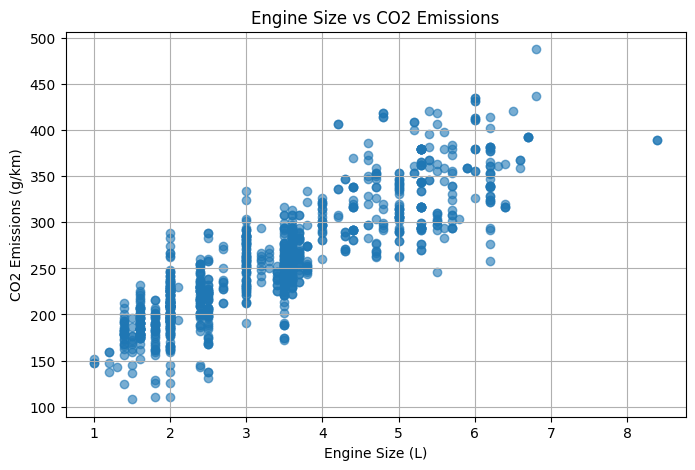

In [4]:
plt.figure(figsize=(8,5))
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, alpha=0.6)
plt.xlabel('Engine Size (L)')
plt.ylabel('CO2 Emissions (g/km)')
plt.title('Engine Size vs CO2 Emissions')
plt.grid(True)
plt.show()

In [5]:
X = cdf[['ENGINESIZE']]
y = cdf[['CO2EMISSIONS']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)

y_pred = model.predict(X_test_poly)

print("R2 score:", r2_score(y_test, y_pred))
X_train_poly

R2 score: 0.7676219471812654


array([[ 1.  ,  1.4 ,  1.96],
       [ 1.  ,  4.4 , 19.36],
       [ 1.  ,  3.  ,  9.  ],
       ...,
       [ 1.  ,  4.4 , 19.36],
       [ 1.  ,  1.8 ,  3.24],
       [ 1.  ,  5.6 , 31.36]], shape=(853, 3))

In [6]:
model = LinearRegression()
model.fit(X_train_poly, y_train)

print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: [112.92021963]
Coefficients: [[ 0.         47.42976379 -1.12705382]]


/home/hadiii/python3/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


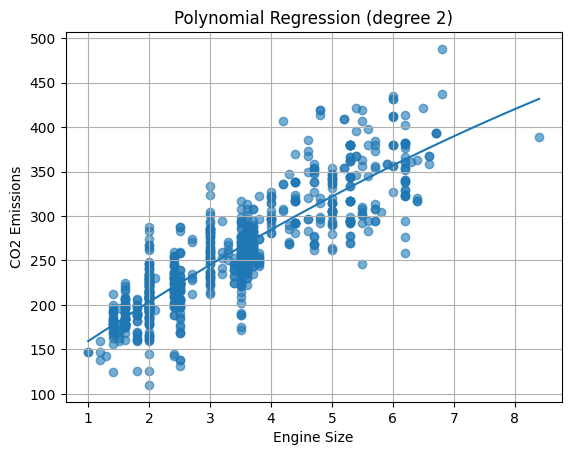

In [7]:
plt.scatter(X_train, y_train, alpha=0.6)

x_curve = np.linspace(min(X_train.values), max(X_train.values), 100)
x_curve_poly = poly.transform(x_curve)
y_curve = model.predict(x_curve_poly)

plt.plot(x_curve, y_curve)
plt.xlabel("Engine Size")
plt.ylabel("CO2 Emissions")
plt.title("Polynomial Regression (degree 2)")
plt.grid(True)
plt.show()